# Model Notebook

This is the notebook for model in age gender detector. Here, we will extract the data ,train it and fit it into our model, and will evaluate our results and optimize the model for better results.

## Import the Necessary Libraries

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

## Extract data from the dataset

If data has not been downloaded yet, download it from [Here](https://www.kaggle.com/jangedoo/utkface-new)

In [3]:
fldr="./UTkFace"

In [4]:
import os
flies=os.listdir(fldr)

## Create List of images from the dataset

In [5]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)


./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

## Create List of Age and Gender from the dataset

In [6]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

## Viewing a sample

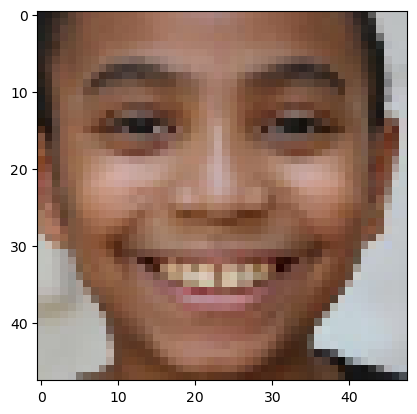

In [7]:
plt.imshow(images[87])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


## Saving images array,ages array, and genders array in the system

In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding the no. of Male and Female samples respectively

In [12]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Plotting the No. of Male and Female Samples

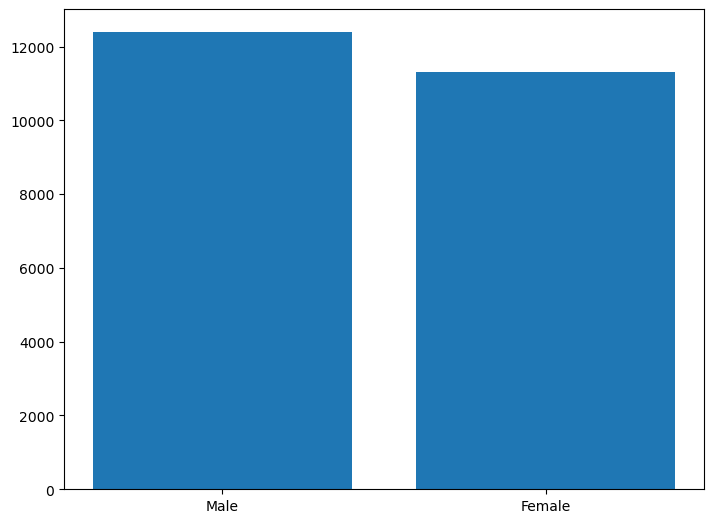

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

## Finding The no. of samples in each age

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Converting Age counts to lists

In [15]:
val=values.tolist()
cnt=counts.tolist()

## Plotting The Samples Agewise

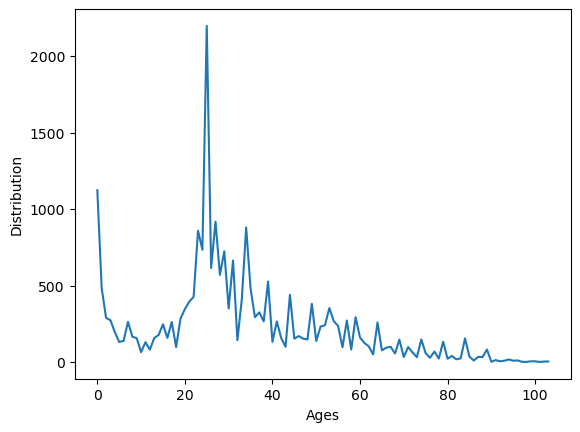

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Defining Labes for Output

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## Creating another list of images from existing one
### For better learning

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

## Splitting The Dataset into test and train

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
Y_train[0:5]

array([[ 9,  0],
       [41,  0],
       [21,  0],
       [34,  1],
       [42,  0]])

## Splitting 'Y_test' and 'Y_train' further
### For better understanding  

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([0, 0, 0, 1, 0])

In [26]:
Y_train_2[1][0:5]

array([ 9, 41, 21, 34, 42])

## Defining the Model

In [27]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x


In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Conv2D(64, (3, 3), activation='relu')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Conv2D(128, (3, 3), activation='relu')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Conv2D(256, (3, 3), activation='relu')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

In [29]:
model = model((48, 48, 3))

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 46, 46,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 23, 23,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 21, 21,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 10, 10,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 2, 2, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 1, 1, 256) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 256)       │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     16,448 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │     16,448 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sex_out (Dense)     │ (None, 1)         │         65 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 421,442 (1.61 MB)

 Trainable params: 421,442 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing the Model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

fle_s = 'Age_Sex_Detection.keras'  # Adjusted filepath
checkpoint = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop = EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)
callback_list = [checkpoint, Early_stop]


## Running the Model
### This will take time (coffee break)

In [33]:
# Compile the model with metrics for each output separately
model.compile(loss=["binary_crossentropy", "mae"], 
              optimizer="Adam", 
              metrics=[['accuracy'], ['mae']])

# Fit the model without specifying metrics in the fit() method
History = model.fit(X_train, 
                    Y_train_2, 
                    batch_size=64, 
                    validation_data=(X_test, Y_test_2), 
                    epochs=250, 
                    callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - age_out_mae: 18.1267 - loss: 18.9006 - sex_out_accuracy: 0.5042
Epoch 1: val_loss improved from inf to 15.09810, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - age_out_mae: 18.1203 - loss: 18.8941 - sex_out_accuracy: 0.5042 - val_age_out_mae: 14.4115 - val_loss: 15.0981 - val_sex_out_accuracy: 0.5276
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - age_out_mae: 14.5314 - loss: 15.2003 - sex_out_accuracy: 0.5825
Epoch 2: val_loss improved from 15.09810 to 13.24590, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 33s 120ms/step - age_out_mae: 14.5297 - loss: 15.1985 - sex_out_accuracy: 0.5827 - val_age_out_mae: 12.6665 - val_loss: 13.2459 - val_sex_out_accuracy: 0.7149
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - age_out_mae: 13.1051 - loss: 13.6828 - sex_out_accuracy: 0.7026
Epoch 3: val_loss improved from 13.24590 to 11.34066, saving model to Age_Sex_D

## Model Evaluation

In [34]:
model.evaluate(X_test, Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - age_out_mae: 6.5594 - loss: 6.8298 - sex_out_accuracy: 0.8824


[6.9406046867370605, 6.676212310791016, 0.884933352470398]

In [35]:
pred=model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


In [36]:
pred[1]

array([[27.369081],
       [24.668112],
       [26.728964],
       ...,
       [40.695198],
       [35.519558],
       [31.057283]], dtype=float32)

## Plotting Loss

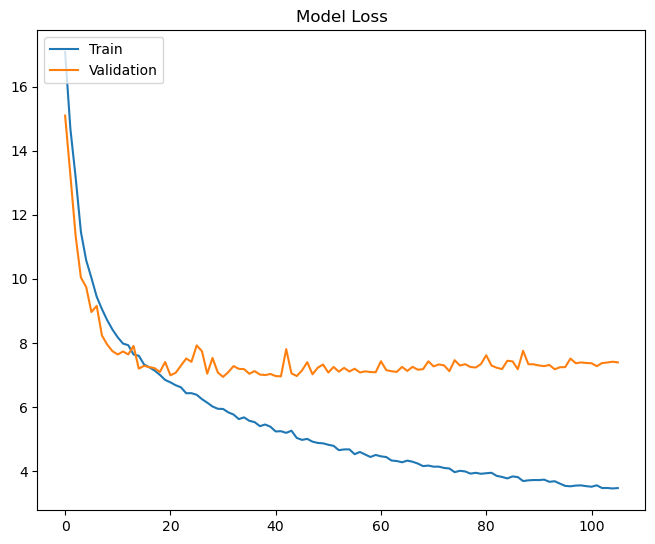

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Sex Accuracy

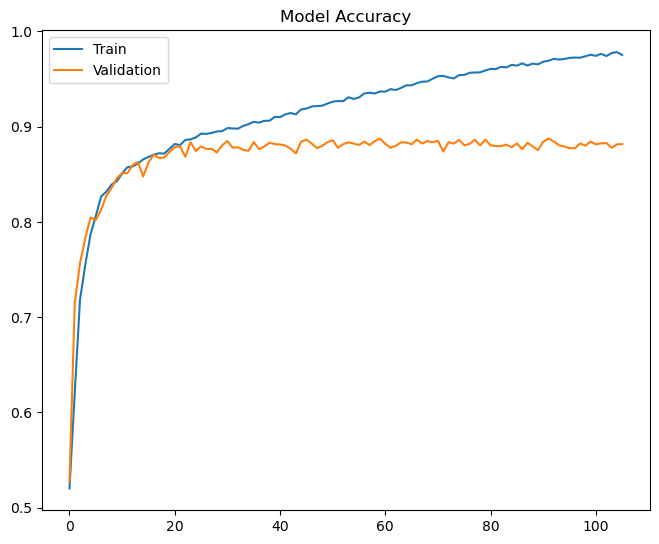

In [38]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

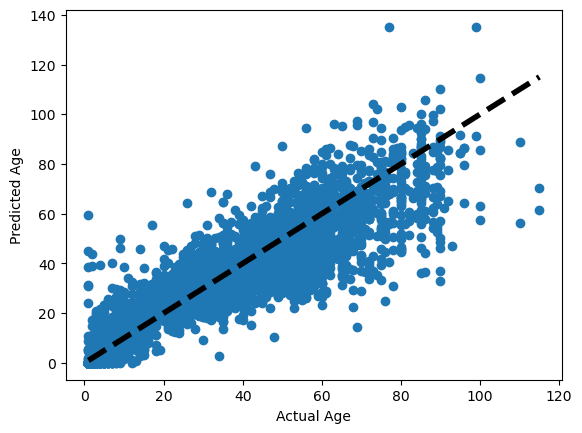

In [39]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making Report of the Model (Gender Only)

In [40]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    

C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\2690061568.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [42]:
report=classification_report(Y_test_2[0],Pred_l)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3127
           1       0.86      0.90      0.88      2800

    accuracy                           0.88      5927
   macro avg       0.88      0.89      0.88      5927
weighted avg       0.89      0.88      0.89      5927



## Making Heatmap of the Model (Gender only)

In [44]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

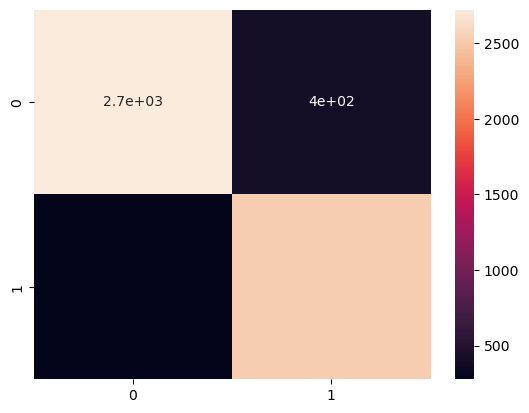

In [45]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing The Images Ourself

In [46]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])
    

### Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Age is 14
Predicted Gender is Female


C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


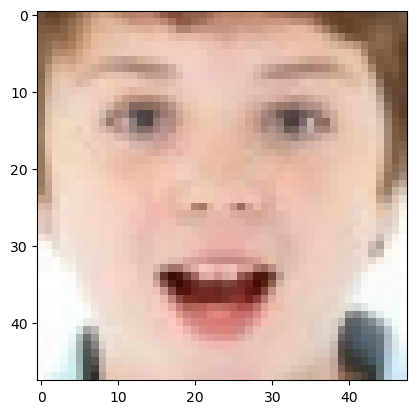

In [52]:
test_image(192,images_f,images_f_2,model)

### Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Age is 11
Predicted Gender is Female


C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


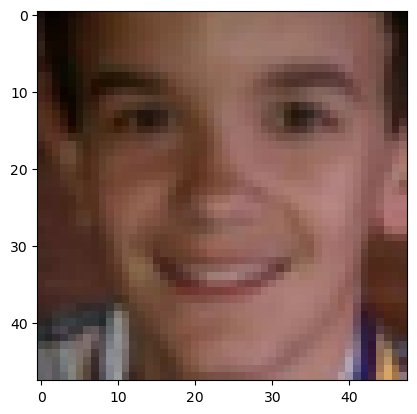

In [48]:
test_image(23,images_f,images_f_2,model)

### Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Age is 17
Predicted Gender is Female


C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


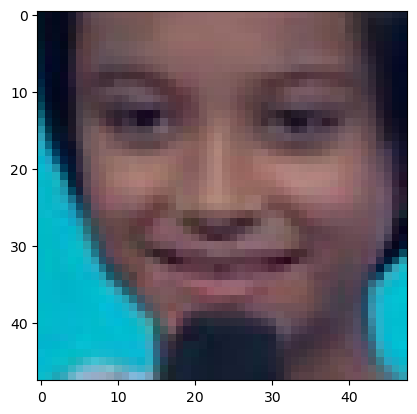

In [49]:
test_image(168,images_f,images_f_2,model)

### Test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Age is 12
Predicted Gender is Female


C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


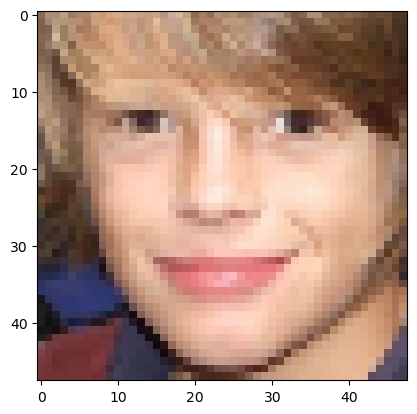

In [50]:
test_image(78,images_f,images_f_2,model)

### Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 16
Predicted Gender is Female


C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shaik\AppData\Local\Temp\ipykernel_23436\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


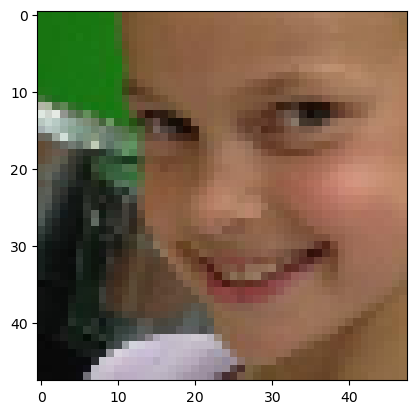

In [51]:
test_image(129,images_f,images_f_2,model)